In [4]:
#for importing data
import sys
import pathlib
src_path = pathlib.Path().absolute().parent /"src"
sys.path.append(str(src_path))
import data_functions as dfun

#import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
import matplotlib as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

import seaborn as sns


from copy import deepcopy

import itertools

from statistics import mean



In [5]:
x_train, x_test, y_train = dfun.get_dataframes()

In [6]:
x_train.drop(['date_recorded','installer','funder','wpt_name', 'subvillage','ward','recorded_by','scheme_name','scheme_management','extraction_type',
             'extraction_type_class','payment','public_meeting','permit','management','management_group','source','source_class',
             'waterpoint_type_group','latitude','longitude','num_private','region_code','district_code'], inplace=True, axis=1)

x_test.drop(['date_recorded','installer','funder','wpt_name', 'subvillage','ward','recorded_by','scheme_name','scheme_management','extraction_type',
             'extraction_type_class','payment','public_meeting','permit','management','management_group','source','source_class',
             'waterpoint_type_group','latitude','longitude','num_private','region_code','district_code'], inplace=True, axis=1)

In [7]:
x_train_nums= x_train.select_dtypes(exclude="object")
x_train_cat= x_train.select_dtypes(include="object")
ohe=OneHotEncoder(drop='first', sparse=False)
x_train_ohe=pd.DataFrame(ohe.fit_transform(x_train_cat), columns= ohe.get_feature_names(x_train_cat.columns), index= x_train_cat.index)
si=SimpleImputer()
x_nums_si=pd.DataFrame(si.fit_transform(x_train_nums), index= x_train_nums.index, columns= x_train_nums.columns)
scale= StandardScaler()
x_train_nums_scaled= pd.DataFrame(scale.fit_transform(x_nums_si), index= x_nums_si.index, columns= x_nums_si.columns)
x_final= x_train_nums_scaled.join(x_train_ohe)

In [8]:
x_val, x_val_test, y_val, y_val_test= train_test_split(x_final, y_train, random_state=2020)

bin_y = lambda x: 1 if x == 'functional' else 0
y_val = y_val['status_group'].apply(bin_y)
y_val_test = y_val_test['status_group'].apply(bin_y)


In [9]:
best_random_forest = RandomForestClassifier(max_features = 100, min_samples_leaf = 5, n_estimators = 200)


In [10]:
best_random_forest.fit(x_val, y_val)

RandomForestClassifier(max_features=100, min_samples_leaf=5, n_estimators=200)

In [11]:

feature_importance_df = pd.DataFrame(list(zip(x_val.columns, best_random_forest.feature_importances_)), columns = ['feature', 'importance'])

In [12]:
feat_top10= feature_importance_df.sort_values(['importance'], ascending = False).head(10)
feat_top10


,feature,importance
1,gps_height,0.095092
205,waterpoint_type_other,0.090786
3,construction_year,0.080021
2,population,0.058055
186,quantity_enough,0.045738
190,quantity_group_enough,0.041092
161,extraction_type_group_other,0.037597
0,amount_tsh,0.035458
188,quantity_seasonal,0.035408
192,quantity_group_seasonal,0.031308


In [13]:
df_top10 = pd.DataFrame(feat_top10)
df_top10
csv_top10= df_top10.to_csv('top_10_feat.csv')

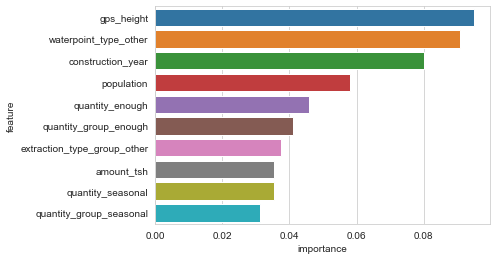

In [14]:
sns.set_style(style = 'whitegrid')
ax = sns.barplot(x='importance', y ='feature', data = feat_top10)

In [15]:
feat_top20= feature_importance_df.sort_values(['importance'], ascending = False).head(20)
feat_top20
df_top20 = pd.DataFrame(feat_top20)
df_top20
csv_top20= df_top20.to_csv('top_20_feat.csv')

In [16]:
confusion_matrix(y_val_test, best_random_forest.predict(x_val_test))


array([[4955, 1885],
       [ 992, 7018]])

AttributeError: module 'matplotlib' has no attribute 'savefig'

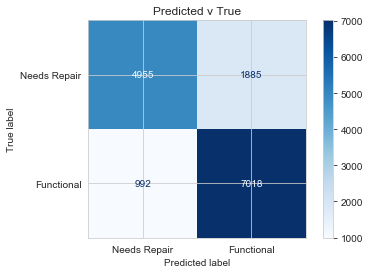

In [17]:
rf = RandomForestClassifier()

cm_1= plot_confusion_matrix(best_random_forest, x_val_test,y_val_test , display_labels=['Needs Repair', 'Functional'],
                                 cmap=plt.cm.Blues)

cm_1.ax_.set_title('Predicted v True');
plt.savefig('confusion_matrix_1.png', dpi = 200)

In [18]:

print(classification_report(y_val_test, best_random_forest.predict(x_val_test)))

              precision    recall  f1-score   support

           0       0.83      0.72      0.78      6840
           1       0.79      0.88      0.83      8010

    accuracy                           0.81     14850
   macro avg       0.81      0.80      0.80     14850
weighted avg       0.81      0.81      0.80     14850



In [19]:
best_random_forest.score(x_val_test, y_val_test)

0.8062626262626262

version 2

In [20]:
new_best = RandomForestClassifier(max_features = 75, min_samples_leaf = 3, n_estimators = 200)

In [21]:
new_best.fit(x_val, y_val)

RandomForestClassifier(max_features=75, min_samples_leaf=3, n_estimators=200)

In [22]:
new_best.score(x_val_test, y_val_test)

0.8088215488215488

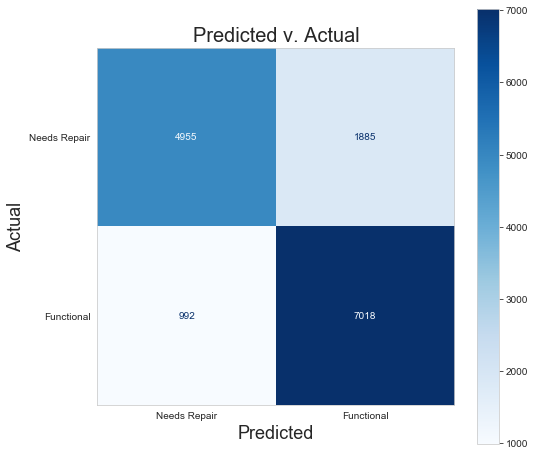

<Figure size 432x288 with 0 Axes>

In [46]:
# rf = RandomForestClassifier()
# plt.figure()
# cm_2= plot_confusion_matrix(best_random_forest, x_val_test,y_val_test , display_labels=['Needs Repair', 'Functional'],
#                                  cmap=plt.cm.Blues)

#cm_2.ax_.set_title('Predicted v True');
import matplotlib.pyplot as plt


fig, ax= plt.subplots(figsize=(8,8))
plot_confusion_matrix(best_random_forest, x_val_test,y_val_test, 
                      display_labels=['Needs Repair', 'Functional'], ax = ax, cmap=plt.cm.Blues)


plt.title('Predicted v. Actual', fontsize = 20)
ax.grid(False)
plt.xlabel('Predicted', fontsize = 18)
plt.ylabel('Actual', fontsize = 18)
#ax.xticklabels('Needs Repair2', Fontsize =14 )
plt.show()
plt.savefig('confusion_matrix_2.png', dpi = 200)

#fig.suptitle('test title', fontsize=20)
#plt.xlabel('xlabel', fontsize=18)
#plt.ylabel('ylabel', fontsize=16)

In [27]:
new_top20= feature_importance_df.sort_values(['importance'], ascending = False).head(20)
new_top20
newdf_top20 = pd.DataFrame(new_top20)
newdf_top20
csvnew_top20= df_top20.to_csv('new_20_feat.csv')